In [1]:
import IPython
import os
import pandas as pd
import pathlib
import sys
import matplotlib.pyplot as plt
#from matplotlib import colormaps
import numpy as np 

module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

from data_pipeline.etl.base import ExtractTransformLoad
from data_pipeline.score import field_names

DATA_DIR = pathlib.Path.cwd().parent / "data"

In [2]:
# Load
path_to_score_file_prod = DATA_DIR / "score/csv/full/usa__scores__DAC_results__\
before_poverty_calculation_changes.csv"

path_to_score_file_blanket = DATA_DIR / "score/csv/full/usa__scores__DAC_results__\
baseline_6ii.csv"

path_to_score_file_unadjusted = DATA_DIR / "score/csv/full/usa__scores__DAC_results__\
unadjusted_7.csv"

path_to_score_file_interpolated = DATA_DIR / "score/csv/full/usa__scores__DAC_results__\
interpolated_8.csv"

score_prod = pd.read_csv(
    path_to_score_file_prod,
    dtype={ExtractTransformLoad.GEOID_TRACT_FIELD_NAME: "string"},
).rename(columns={'Definition N community, including adjacency index tracts': 'is_dac_final',
                  'Definition N (communities)': 'is_dac_pre_donut'})

score_blanket = pd.read_csv(
    path_to_score_file_blanket,
    dtype={ExtractTransformLoad.GEOID_TRACT_FIELD_NAME: "string"},
).rename(columns={'Definition N community, including adjacency index tracts': 'is_dac_final',
                  'Definition N (communities)': 'is_dac_pre_donut'})

score_unadjusted = pd.read_csv(
    path_to_score_file_unadjusted,
    dtype={ExtractTransformLoad.GEOID_TRACT_FIELD_NAME: "string"},
).rename(columns={'Definition N community, including adjacency index tracts': 'is_dac_final',
                  'Definition N (communities)': 'is_dac_pre_donut'})

score_interpolated = pd.read_csv(
    path_to_score_file_interpolated,
    dtype={ExtractTransformLoad.GEOID_TRACT_FIELD_NAME: "string"},
).rename(columns={'Definition N community, including adjacency index tracts': 'is_dac_final',
                  'Definition N (communities)': 'is_dac_pre_donut'})

score_prod.head()

/var/folders/5l/yccn5hf936bdstc1y3zxpbkc0000gn/T/ipykernel_32367/3866372662.py:14: DtypeWarning: Columns (1,2,3,77,78,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  score_prod = pd.read_csv(
/var/folders/5l/yccn5hf936bdstc1y3zxpbkc0000gn/T/ipykernel_32367/3866372662.py:20: DtypeWarning: Columns (1,2,3,77,78,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  score_blanket = pd.read_csv(
/var/folders/5l/yccn5hf936bdstc1y3zxpbkc0000gn/T/ipykernel_32367/3866372662.py:26: DtypeWarning: Columns (1,2,3,77,78,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  score_unadjusted = pd.read_csv(
/var/folders/5l/yccn5hf936bdstc1y3zxpbkc0000gn/T/ipykernel_32367/3866372662.py:32: DtypeWarning: Columns (1,2,3,77,78,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  score_interpolated = pd.read_csv(


,GEOID10_TRACT,Does the tract have at least 35 acres in it?,Contains agricultural value,Names of Tribal areas within Census tract,Housing burden (percent),Share of homes with no kitchen or indoor plumbing (percent),Total population,Median household income (% of state median household income),Current asthma among adults aged greater than or equal to 18 years,Coronary heart disease among adults aged greater than or equal to 18 years,...,Workforce Factor (Definition N),Total categories exceeded,is_dac_pre_donut,Definition N (communities) (percentile),Meets the less stringent low income criterion for the adjacency index?,Definition N (communities) (average of neighbors),Is the tract surrounded by disadvantaged communities?,Definition N (communities) (based on adjacency index and low income alone),is_dac_final,Percentage of tract that is disadvantaged
0,01073001100,True,True,NaN,0.275204,0.000000,4781.0,0.732745,11.2,7.2,...,False,0.0,False,0,True,0.857143,False,False,False,0.0
1,01073001400,True,True,NaN,0.182353,0.004706,1946.0,0.713669,11.1,9.1,...,True,6.0,True,1,True,1.000000,True,True,True,1.0
2,01073002000,True,True,NaN,0.435088,0.006873,4080.0,0.537419,13.5,9.5,...,True,3.0,True,1,True,1.000000,True,True,True,1.0
3,01073003802,True,True,NaN,0.411141,0.038961,5291.0,0.766206,12.0,6.6,...,False,4.0,True,1,True,1.000000,True,True,True,1.0
4,01073004000,True,False,NaN,0.468310,0.009901,2533.0,0.366570,13.1,10.0,...,True,5.0,True,1,True,1.000000,True,True,True,1.0


In [3]:
# Make sure we're not adding or removing any columns to the final usa.csv file
assert len(score_blanket.columns.difference(score_prod.columns))==0
assert len(score_unadjusted.columns.difference(score_prod.columns))==0
assert len(score_interpolated.columns.difference(score_prod.columns))==0

In [4]:
new_method_result_dfs = [score_blanket, score_unadjusted, score_interpolated]

In [5]:
# List rows in one but not the other

for score_df in new_method_result_dfs:
    
    if len(score_df[ExtractTransformLoad.GEOID_TRACT_FIELD_NAME]) != len(
        score_prod[ExtractTransformLoad.GEOID_TRACT_FIELD_NAME]
    ):
        print("Different lengths!")

    print("Difference in tract IDs:")
    print(
        set(score_df[ExtractTransformLoad.GEOID_TRACT_FIELD_NAME])
        ^ set(score_prod[ExtractTransformLoad.GEOID_TRACT_FIELD_NAME])
    )

Difference in tract IDs:
set()
Difference in tract IDs:
set()
Difference in tract IDs:
set()


In [6]:
# Join
merged_prod_blanket = score_prod.merge(
    score_blanket,
    how="outer",
    on=ExtractTransformLoad.GEOID_TRACT_FIELD_NAME,
    suffixes=("_production", "_blanket"),
)
merged_unadjusted_interpolated = score_unadjusted.merge(
    score_interpolated,
    how="outer",
    on=ExtractTransformLoad.GEOID_TRACT_FIELD_NAME,
    suffixes=("_unadjusted", "_interpolated"),
)
merged_scores = merged_unadjusted_interpolated.merge(
    merged_prod_blanket,
    how="outer",
    on=ExtractTransformLoad.GEOID_TRACT_FIELD_NAME,
)
merged_scores.head()

,GEOID10_TRACT,Does the tract have at least 35 acres in it?_unadjusted,Contains agricultural value_unadjusted,Names of Tribal areas within Census tract_unadjusted,Housing burden (percent)_unadjusted,Share of homes with no kitchen or indoor plumbing (percent)_unadjusted,Total population_unadjusted,Median household income (% of state median household income)_unadjusted,Current asthma among adults aged greater than or equal to 18 years_unadjusted,Coronary heart disease among adults aged greater than or equal to 18 years_unadjusted,...,Workforce Factor (Definition N)_blanket,Total categories exceeded_blanket,is_dac_pre_donut_blanket,Definition N (communities) (percentile)_blanket,Meets the less stringent low income criterion for the adjacency index?_blanket,Definition N (communities) (average of neighbors)_blanket,Is the tract surrounded by disadvantaged communities?_blanket,Definition N (communities) (based on adjacency index and low income alone)_blanket,is_dac_final_blanket,Percentage of tract that is disadvantaged_blanket
0,01073001100,True,True,NaN,0.275204,0.000000,4781.0,0.732745,11.2,7.2,...,False,0.0,False,0,True,0.857143,False,False,False,0.0
1,01073001400,True,True,NaN,0.182353,0.004706,1946.0,0.713669,11.1,9.1,...,True,6.0,True,1,True,1.000000,True,True,True,1.0
2,01073002000,True,True,NaN,0.435088,0.006873,4080.0,0.537419,13.5,9.5,...,True,3.0,True,1,True,1.000000,True,True,True,1.0
3,01073003802,True,True,NaN,0.411141,0.038961,5291.0,0.766206,12.0,6.6,...,False,4.0,True,1,True,1.000000,True,True,True,1.0
4,01073004000,True,False,NaN,0.468310,0.009901,2533.0,0.366570,13.1,10.0,...,True,5.0,True,1,True,1.000000,True,True,True,1.0


In [7]:
uni_dict = {
    '06071004510': 'California State University, San Bernardino',
    '36061020300': 'Columbia University',
    '51650011400': 'Hampton University',
    '51710004700': 'Norfolk State University',
    '06085513000': 'Stanford University 1',
    '06085511608': 'Stanford University 2',
    '01073004500': 'University of Alabama',
    '17031836200': 'University of Chicago',
    '06037222700': 'University of Southern California'
}


uni_tracts = uni_dict.keys()

In [8]:
method_names = ['production', 'unadjusted', 'blanket', 'interpolated']
uni_scores = merged_scores.loc[merged_scores.GEOID10_TRACT.isin(uni_tracts)]
uni_scores['school_name'] = uni_scores.GEOID10_TRACT.apply(lambda x: uni_dict[x])
uni_scores[['GEOID10_TRACT', 'school_name']+['is_dac_final_'+x for x in method_names]]\
    .sort_values(by='GEOID10_TRACT')

/var/folders/5l/yccn5hf936bdstc1y3zxpbkc0000gn/T/ipykernel_32367/565559183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_scores['school_name'] = uni_scores.GEOID10_TRACT.apply(lambda x: uni_dict[x])


,GEOID10_TRACT,school_name,is_dac_final_production,is_dac_final_unadjusted,is_dac_final_blanket,is_dac_final_interpolated
861,01073004500,University of Alabama,False,True,True,True
6992,06037222700,University of Southern California,False,True,False,True
4764,06071004510,"California State University, San Bernardino",False,True,True,True
8901,06085511608,Stanford University 2,False,False,False,False
4403,06085513000,Stanford University 1,False,True,False,False
23695,17031836200,University of Chicago,False,False,False,False
46307,36061020300,Columbia University,False,True,False,False
69220,51650011400,Hampton University,False,True,True,False
69512,51710004700,Norfolk State University,True,True,True,True


In [9]:
n_dac_pre = []
n_dac_final = []
n_diff_prod_pre = []
n_diff_prod_final = []
n_diff_unadj_pre = []
n_diff_unadj_final = []
n_added_prod_pre = []
n_added_prod_final = []
n_removed_prod_pre = []
n_removed_prod_final = []
n_added_unadj_pre = []
n_added_unadj_final = []
n_removed_unadj_pre = []
n_removed_unadj_final = []



for method in method_names:
    final_dac_col = f'is_dac_final_{method}'
    pre_dac_col = f'is_dac_pre_donut_{method}'
    
    n_dac_pre.append(merged_scores[pre_dac_col].sum())
    n_dac_final.append(merged_scores[final_dac_col].sum())
    n_diff_prod_pre.append(sum(merged_scores[pre_dac_col]\
                               !=merged_scores['is_dac_pre_donut_production']))
    n_diff_prod_final.append(sum(merged_scores[final_dac_col]\
                                 !=merged_scores['is_dac_final_production']))
    n_added_prod_pre.append(len(merged_scores[(merged_scores[pre_dac_col]==True)\
                                              & (merged_scores['is_dac_pre_donut_production']==False)]))
    n_added_prod_final.append(len(merged_scores[(merged_scores[final_dac_col]==True)\
                                                & (merged_scores['is_dac_final_production']==False)]))
    n_removed_prod_pre.append(len(merged_scores[(merged_scores[pre_dac_col]==False)\
                                                & (merged_scores['is_dac_pre_donut_production']==True)]))
    n_removed_prod_final.append(len(merged_scores[(merged_scores[final_dac_col]==False)\
                                                  & (merged_scores['is_dac_final_production']==True)]))
    n_diff_unadj_pre.append(sum(merged_scores[pre_dac_col]!=merged_scores['is_dac_pre_donut_unadjusted']))
    n_diff_unadj_final.append(sum(merged_scores[final_dac_col]!=merged_scores['is_dac_final_unadjusted']))
    n_added_unadj_pre.append(len(merged_scores[(merged_scores[pre_dac_col]==True)\
                                               & (merged_scores['is_dac_pre_donut_unadjusted']==False)]))
    n_added_unadj_final.append(len(merged_scores[(merged_scores[final_dac_col]==True)\
                                                 & (merged_scores['is_dac_final_unadjusted']==False)]))
    n_removed_unadj_pre.append(len(merged_scores[(merged_scores[pre_dac_col]==False) \
                                                 & (merged_scores['is_dac_pre_donut_unadjusted']==True)]))
    n_removed_unadj_final.append(len(merged_scores[(merged_scores[final_dac_col]==False) \
                                                   & (merged_scores['is_dac_final_unadjusted']==True)]))

final_dac_df = pd.DataFrame({
    'method': method_names,
    'n_dac_final': n_dac_final,
    'n_diff_vs_prod': n_diff_prod_final,
    'n_added_vs_prod': n_added_prod_final,
    'n_removed_vs_prod': n_removed_prod_final,
    'n_diff_vs_unadj': n_diff_unadj_final,
    'n_added_vs_unadj': n_added_unadj_final,
    'n_remove_vs_unadj': n_removed_unadj_final,
    
})

pre_dac_df = pd.DataFrame({
    'method': method_names,
    'n_dac_pre_donuts': n_dac_pre,
    'n_diff_vs_prod': n_diff_prod_pre,
    'n_added_vs_prod': n_added_prod_pre,
    'n_removed_vs_prod': n_removed_prod_pre,   
    'n_diff_vs_unadj': n_diff_unadj_pre,
    'n_added_vs_unadj': n_added_unadj_pre,
    'n_remove_vs_unadj': n_removed_unadj_pre,
 
})

display(final_dac_df)
display(pre_dac_df)

,method,n_dac_final,n_diff_vs_prod,n_added_vs_prod,n_removed_vs_prod,n_diff_vs_unadj,n_added_vs_unadj,n_remove_vs_unadj
0,production,27311,0,0,0,3647,2019,1628
1,unadjusted,26920,3647,1628,2019,0,0,0
2,blanket,27192,1671,776,895,2124,1198,926
3,interpolated,27016,3083,1394,1689,1598,847,751


,method,n_dac_pre_donuts,n_diff_vs_prod,n_added_vs_prod,n_removed_vs_prod,n_diff_vs_unadj,n_added_vs_unadj,n_remove_vs_unadj
0,production,27032,0,0,0,3551,1956,1595
1,unadjusted,26671,3551,1595,1956,0,0,0
2,blanket,26921,1619,754,865,2072,1161,911
3,interpolated,26763,2995,1363,1632,1562,827,735


## Look at Census ACS output file

In [10]:
path_to_census_acs_file = DATA_DIR / "dataset/census_acs/usa.csv"

census_acs = pd.read_csv(
    path_to_census_acs_file,
    dtype={ExtractTransformLoad.GEOID_TRACT_FIELD_NAME: "string"},
).rename(columns={'poverty_rate__prod':'poverty_rate__production',
                  'poverty_rate__baseline':'poverty_rate__blanket'
})

In [11]:
census_acs.head()

,GEOID10_TRACT,Total population,Unemployment (percent),Linguistic isolation (percent),Median household income in the past 12 months,Percent of individuals < 100% Federal Poverty Line,Percent of individuals < 150% Federal Poverty Line,"Percent of individuals < 200% Federal Poverty Line, imputed",Total population of individuals < 200% Federal Poverty Line,"Total population of individuals < 200% Federal Poverty Line, imputed",...,Percent Native Hawaiian or Pacific,Percent two or more races,Percent White,Percent Hispanic or Latino,Percent other races,Percent age under 10,Percent age 10 to 64,Percent age over 64,Percent of individuals below 200% Federal Poverty Line,"Percent of individuals below 200% Federal Poverty Line, imputed and adjusted"
0,01073001100,4781,0.009207,0.000000,37030.0,0.150376,0.318797,0.374436,1743,1743.0,...,0.0,0.000000,0.016105,0.003556,0.000000,0.134491,0.661577,0.203932,0.374436,0.325145
1,01073001400,1946,0.115012,0.024510,36066.0,0.281603,0.367934,0.483556,941,941.0,...,0.0,0.003597,0.000000,0.068345,0.077595,0.085303,0.725591,0.189106,0.483556,0.447195
2,01073002000,4080,0.137549,0.019732,27159.0,0.513352,0.616172,0.727976,2917,2917.0,...,0.0,0.009314,0.277451,0.075000,0.020098,0.158333,0.719608,0.122059,0.727976,0.713007
3,01073003802,5291,0.103332,0.000000,38721.0,0.196560,0.340389,0.529012,2799,2799.0,...,0.0,0.008505,0.016065,0.000000,0.000000,0.146664,0.720658,0.132678,0.529012,0.495342
4,01073004000,2533,0.211483,0.044787,18525.0,0.405843,0.585077,0.707856,1793,1793.0,...,0.0,0.045006,0.065930,0.068298,0.000000,0.063561,0.688117,0.248322,0.707856,0.697094


In [12]:
def uni_bucket(x):
    if x<0.2:
        return "0-19%"
    if x<0.5:
        return "20-49%"
    if x<0.7:
        return "50-69%"
    if x<0.9:
        return "70-89%"
    return "90-100%"

census_acs['university_attendance_bucketed'] \
    = census_acs['Percent enrollment in college or graduate school, imputed'].apply(uni_bucket)

In [13]:
census_acs['university_attendance_bucketed'].value_counts(normalize=True)

0-19%      0.955242
20-49%     0.024630
90-100%    0.011558
50-69%     0.005313
70-89%     0.003258
Name: university_attendance_bucketed, dtype: float64

In [14]:
prod = 'poverty_rate__production'
blanket = 'poverty_rate__blanket'
unadjusted = 'poverty_rate__unadjusted'
interpolated = 'poverty_rate__interpolated'

new_methods = [unadjusted, blanket, interpolated]
adjustment_methods = [prod, blanket, interpolated]
all_methods = [prod] + new_methods 

for m in new_methods: 
    census_acs[m+'__diff_vs_production'] = census_acs[m] - census_acs[prod]
    
for m in adjustment_methods: 
    census_acs[m+'__diff_vs_unadjusted'] = census_acs[m] - census_acs[unadjusted]

### Distribution of poverty rate, all methods

In [15]:
distribution_df = census_acs[all_methods].describe()
distribution_df.T

,count,mean,std,min,25%,50%,75%,max
poverty_rate__production,73273.0,0.255027,0.187659,0.0,0.101987,0.227329,0.376717,1.0
poverty_rate__unadjusted,73273.0,0.331837,0.187230,0.0,0.183328,0.304424,0.452940,1.0
poverty_rate__blanket,73976.0,0.284264,0.198154,0.0,0.124408,0.255986,0.413512,1.0
poverty_rate__interpolated,73976.0,0.326256,0.192548,0.0,0.173913,0.297788,0.451549,1.0


In [16]:
distribution_df.loc['50%', 'poverty_rate__production']

0.2273291366683434

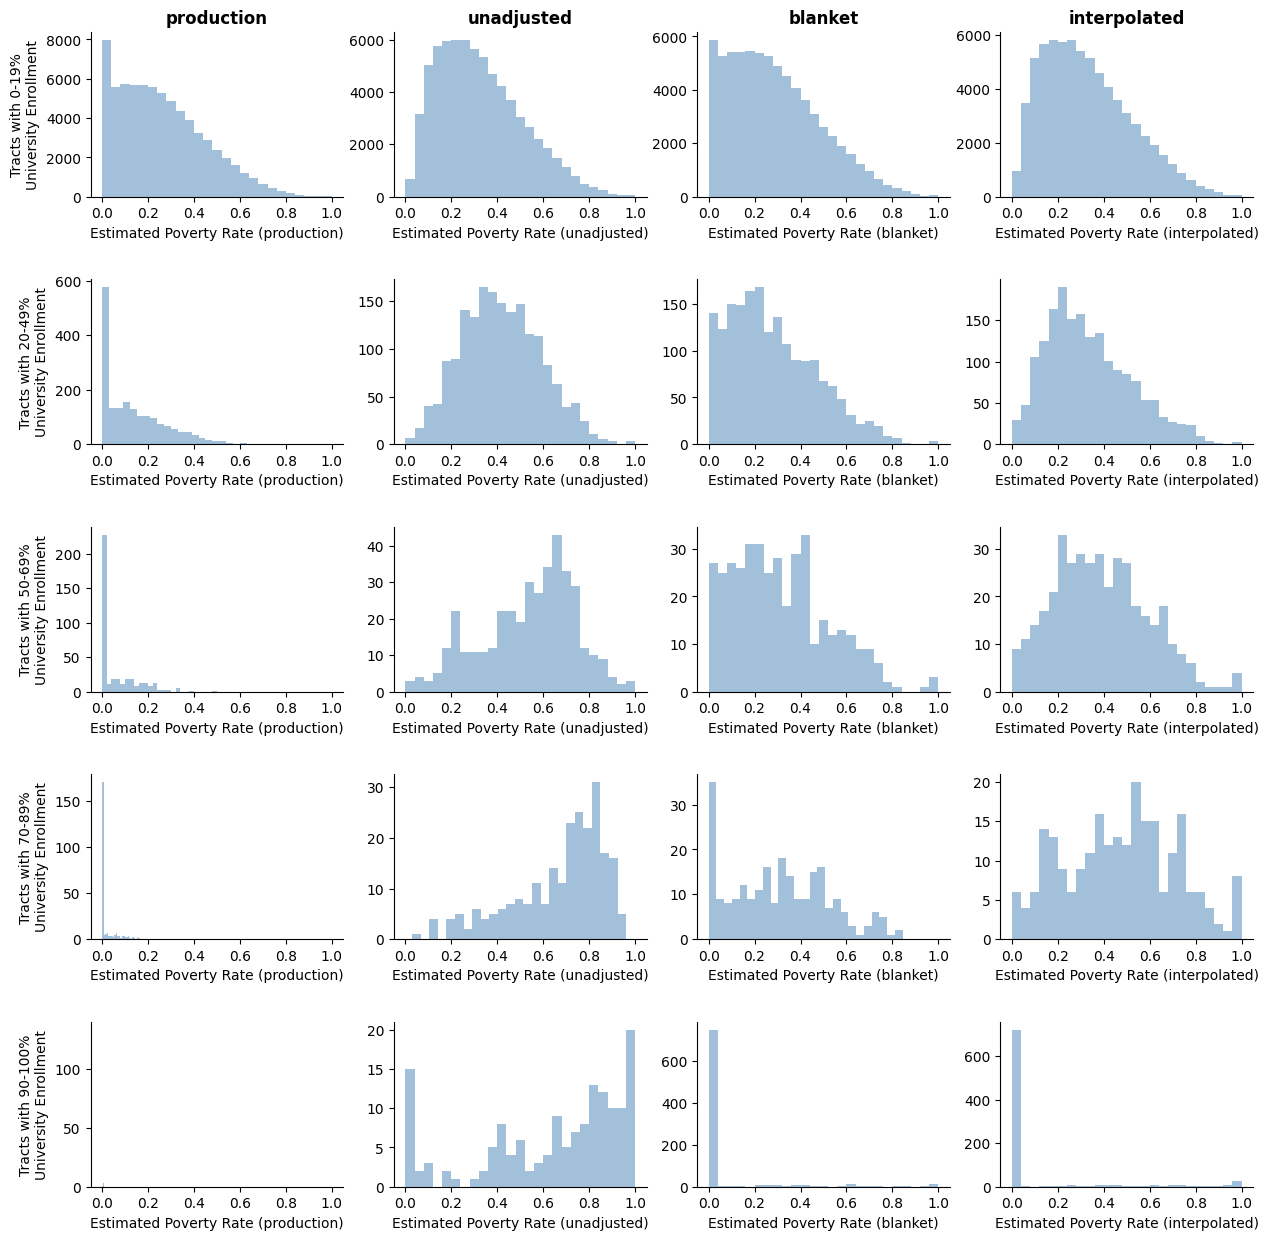

In [17]:
fig, ax = plt.subplots(5, 4, figsize=(15,15), sharex=True)

for b, bucket in enumerate(census_acs['university_attendance_bucketed'].unique()):
    bucket_df = census_acs[census_acs.university_attendance_bucketed==bucket]
    for m, method in enumerate(all_methods):
        ax[b][m].hist(bucket_df[method], bins=25, alpha=0.5, color='steelblue')
        if m==0:
            ax[b][m].set_ylabel(f'Tracts with {bucket}\nUniversity Enrollment')
        if b==0:
            ax[b][m].set_title(method.replace('poverty_rate__', ''), fontweight='bold')
        ax[b][m].xaxis.set_tick_params(labelbottom=True)
        ax[b][m].set_xlabel(f"Estimated Poverty Rate ({method.replace('poverty_rate__', '')})")
        ax[b][m].spines[['right', 'top']].set_visible(False)
plt.subplots_adjust(hspace=0.5)

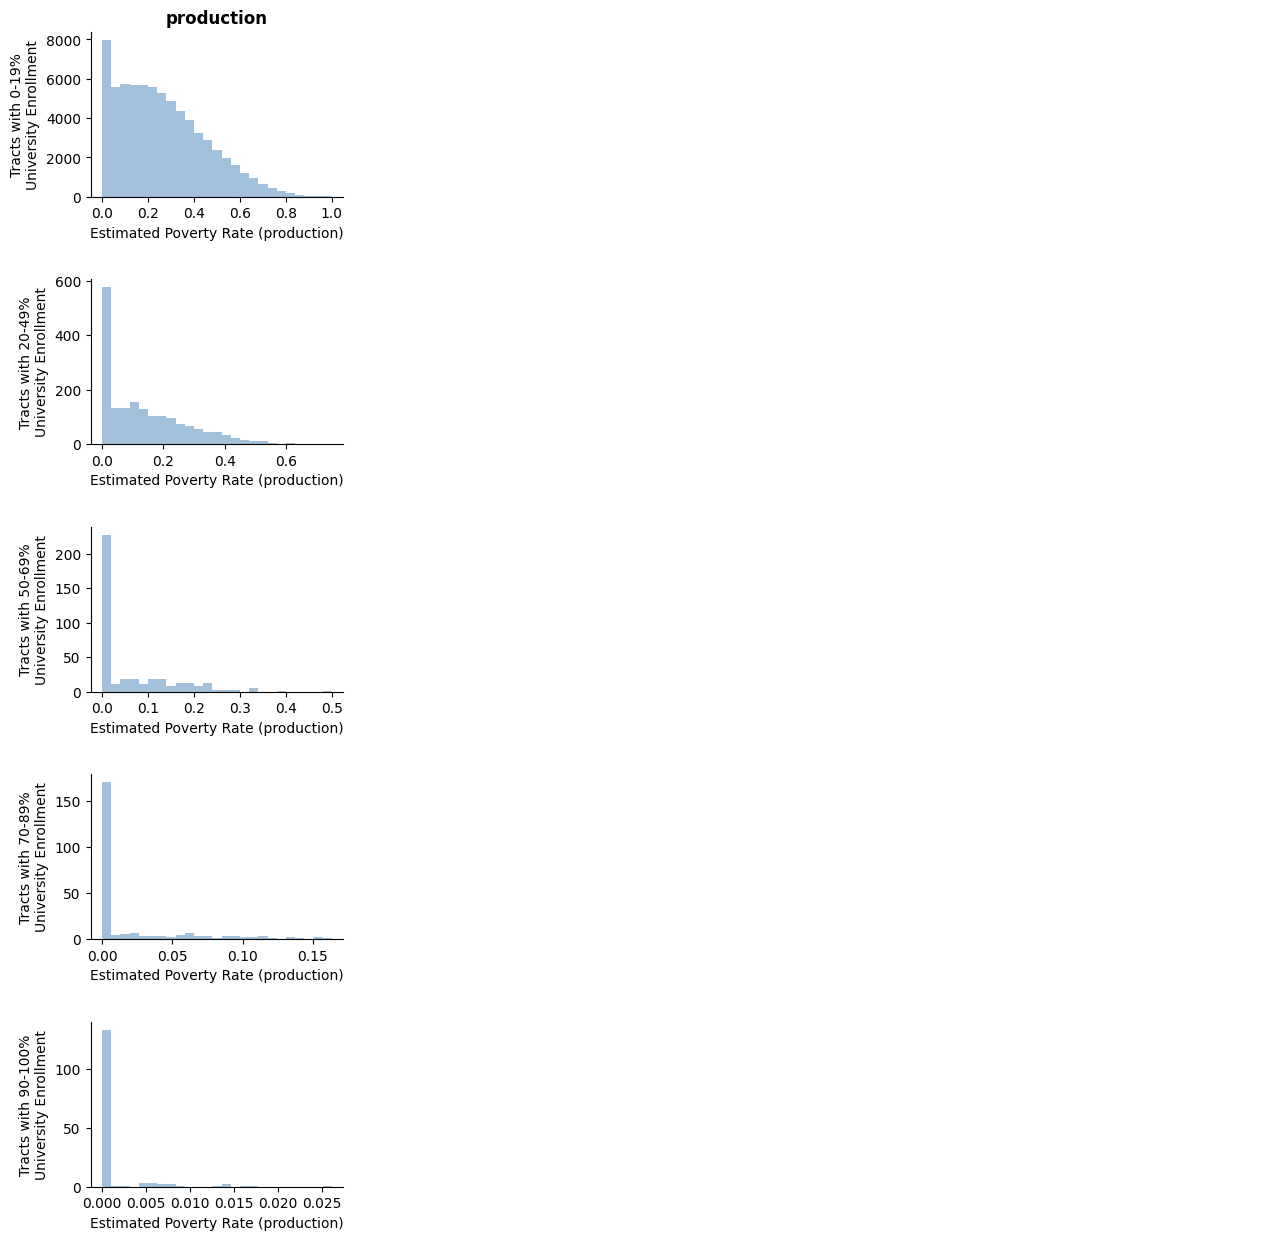

In [18]:
# print prod alone, because it's hard to see on the same scale

fig, ax = plt.subplots(5, 4, figsize=(15,15))

for b, bucket in enumerate(census_acs['university_attendance_bucketed'].unique()):
    bucket_df = census_acs[census_acs.university_attendance_bucketed==bucket]
    for m, method in enumerate([prod]):
        ax[b][m].hist(bucket_df[method], bins=25, alpha=0.5, color='steelblue')
        if m==0:
            ax[b][m].set_ylabel(f'Tracts with {bucket}\nUniversity Enrollment')
        if b==0:
            ax[b][m].set_title(method.replace('poverty_rate__', ''), fontweight='bold')
        ax[b][m].xaxis.set_tick_params(labelbottom=True)
        ax[b][m].set_xlabel(f"Estimated Poverty Rate ({method.replace('poverty_rate__', '')})")
        ax[b][m].spines[['right', 'top']].set_visible(False)
    for m in range(1,4):
        ax[b][m].get_xaxis().set_visible(False)
        ax[b][m].get_yaxis().set_visible(False)
        ax[b][m].spines[['right', 'top', 'left', 'bottom']].set_visible(False)
plt.subplots_adjust(hspace=0.5)

In [19]:
# take a closer look at where interpolated poverty rate > 99%

pd.set_option('display.max_rows', 100)

cols_to_look_at = ['GEOID10_TRACT']\
                  + all_methods\
                  + [
                    'Total population',
                      'Everyone in poverty dataset',
                      'Everyone in poverty dataset, minus all university',
                      'Population enrolled in an undergraduate, graduate, or professional program',
                      'Percent enrollment in college or graduate school',
                      'Population below poverty line enrolled in an undergraduate, \
graduate, or professional program',
                      'Total population of individuals < 125% Federal Poverty Line',
                      'Total population of individuals < 200% Federal Poverty Line'
                  ]

census_acs[census_acs[interpolated]>0.99][cols_to_look_at]\
    .sort_values(by='Percent enrollment in college or graduate school', ascending=False)
            


,GEOID10_TRACT,poverty_rate__production,poverty_rate__unadjusted,poverty_rate__blanket,poverty_rate__interpolated,Total population,Everyone in poverty dataset,"Everyone in poverty dataset, minus all university","Population enrolled in an undergraduate, graduate, or professional program",Percent enrollment in college or graduate school,"Population below poverty line enrolled in an undergraduate, graduate, or professional program",Total population of individuals < 125% Federal Poverty Line,Total population of individuals < 200% Federal Poverty Line
12620,08101000903,0.000000,1.000000,0.000000,1.000000,521,197,1,197,1.000000,173,197,197
25623,19169000800,0.000579,1.000000,1.000000,1.000000,5178,8,3,5,0.999421,5,8,8
45987,36089491100,0.002195,1.000000,1.000000,1.000000,2278,5,5,0,0.997805,0,5,5
18132,12057010900,0.004502,1.000000,1.000000,1.000000,5331,11,11,0,0.995498,0,11,11
25523,18003980001,0.004862,1.000000,1.000000,1.000000,617,3,3,0,0.995138,0,0,3
43848,36029009110,0.005068,1.000000,1.000000,1.000000,5722,8,8,0,0.994932,0,4,8
44972,36001000404,0.005903,1.000000,1.000000,1.000000,5082,15,15,0,0.994097,0,15,15
43981,36091061303,0.005935,1.000000,1.000000,1.000000,2022,12,12,0,0.994065,0,0,12
72345,55025001102,0.006460,1.000000,1.000000,1.000000,3715,193,24,169,0.993540,158,187,193
12980,09003417300,0.007412,1.000000,1.000000,1.000000,1754,6,6,0,0.992588,0,6,6


In [20]:
census_acs[
        (census_acs['Total population']>100) &\
        (census_acs['Everyone in poverty dataset, minus all university']<100)
        ][cols_to_look_at]

,GEOID10_TRACT,poverty_rate__production,poverty_rate__unadjusted,poverty_rate__blanket,poverty_rate__interpolated,Total population,Everyone in poverty dataset,"Everyone in poverty dataset, minus all university","Population enrolled in an undergraduate, graduate, or professional program",Percent enrollment in college or graduate school,"Population below poverty line enrolled in an undergraduate, graduate, or professional program",Total population of individuals < 125% Federal Poverty Line,Total population of individuals < 200% Federal Poverty Line
1095,01097003605,0.000000,0.411853,0.000000,0.000000,951,1,1,0,1.000000,0,0,0
1134,01081040700,0.000000,0.954377,0.543210,1.000000,5309,811,81,730,0.983989,625,699,774
1532,04027980005,0.418026,0.418026,0.000000,0.000000,247,1,1,0,0.000000,0,0,0
1632,04013113400,0.687421,0.687421,0.000000,0.000000,343,1,1,0,0.000000,0,0,0
1781,04013061017,0.096114,0.201665,0.000000,0.000000,3657,1,1,0,0.105551,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71435,54061010101,0.000000,0.856549,0.215909,0.526047,879,481,88,393,0.906071,316,356,412
71734,55101980000,0.641430,0.666667,0.641026,0.717949,964,84,78,6,0.025237,0,50,56
72059,55009021100,0.180976,0.180976,0.000000,0.000000,1173,1,1,0,0.000000,0,0,0
72345,55025001102,0.006460,1.000000,1.000000,1.000000,3715,193,24,169,0.993540,158,187,193


In [21]:
for m in all_methods:
    print(m)
    zero = len(census_acs[census_acs[m]==0])
    print(f'Number of tracts with 0% poverty: {zero}')
    zero_to_one = len(census_acs[census_acs[m].between(0,0.01, inclusive="neither")])
    print(f'Number of tracts with 0-1% poverty: {zero_to_one}')
    one_hundred = len(census_acs[census_acs[m]==1])
    print(f'Number of tracts with 100% poverty: {one_hundred}')
    ninety_nine_to_one_hundred = len(census_acs[census_acs[m].between(0.99,1, inclusive="neither")])
    print(f'Number of tracts with 99-100% poverty: {ninety_nine_to_one_hundred}\n')
    print('\n')

poverty_rate__production
Number of tracts with 0% poverty: 4073
Number of tracts with 0-1% poverty: 1099
Number of tracts with 100% poverty: 21
Number of tracts with 99-100% poverty: 3



poverty_rate__unadjusted
Number of tracts with 0% poverty: 83
Number of tracts with 0-1% poverty: 4
Number of tracts with 100% poverty: 54
Number of tracts with 99-100% poverty: 4



poverty_rate__blanket
Number of tracts with 0% poverty: 2789
Number of tracts with 0-1% poverty: 780
Number of tracts with 100% poverty: 51
Number of tracts with 99-100% poverty: 3



poverty_rate__interpolated
Number of tracts with 0% poverty: 941
Number of tracts with 0-1% poverty: 7
Number of tracts with 100% poverty: 72
Number of tracts with 99-100% poverty: 6





### Distribution of adjustments

In [22]:
adj_diff_cols = [x+'__diff_vs_unadjusted' for x in adjustment_methods]
census_acs[adj_diff_cols].describe()

,poverty_rate__production__diff_vs_unadjusted,poverty_rate__blanket__diff_vs_unadjusted,poverty_rate__interpolated__diff_vs_unadjusted
count,73273.000000,73273.000000,73273.000000
mean,-0.076810,-0.044846,-0.002450
std,0.073824,0.046903,0.037009
min,-1.000000,-1.000000,-1.000000
25%,-0.088099,-0.054550,-0.005050
50%,-0.062705,-0.036268,0.003298
75%,-0.043158,-0.022068,0.010006
max,0.000000,0.000000,0.466667


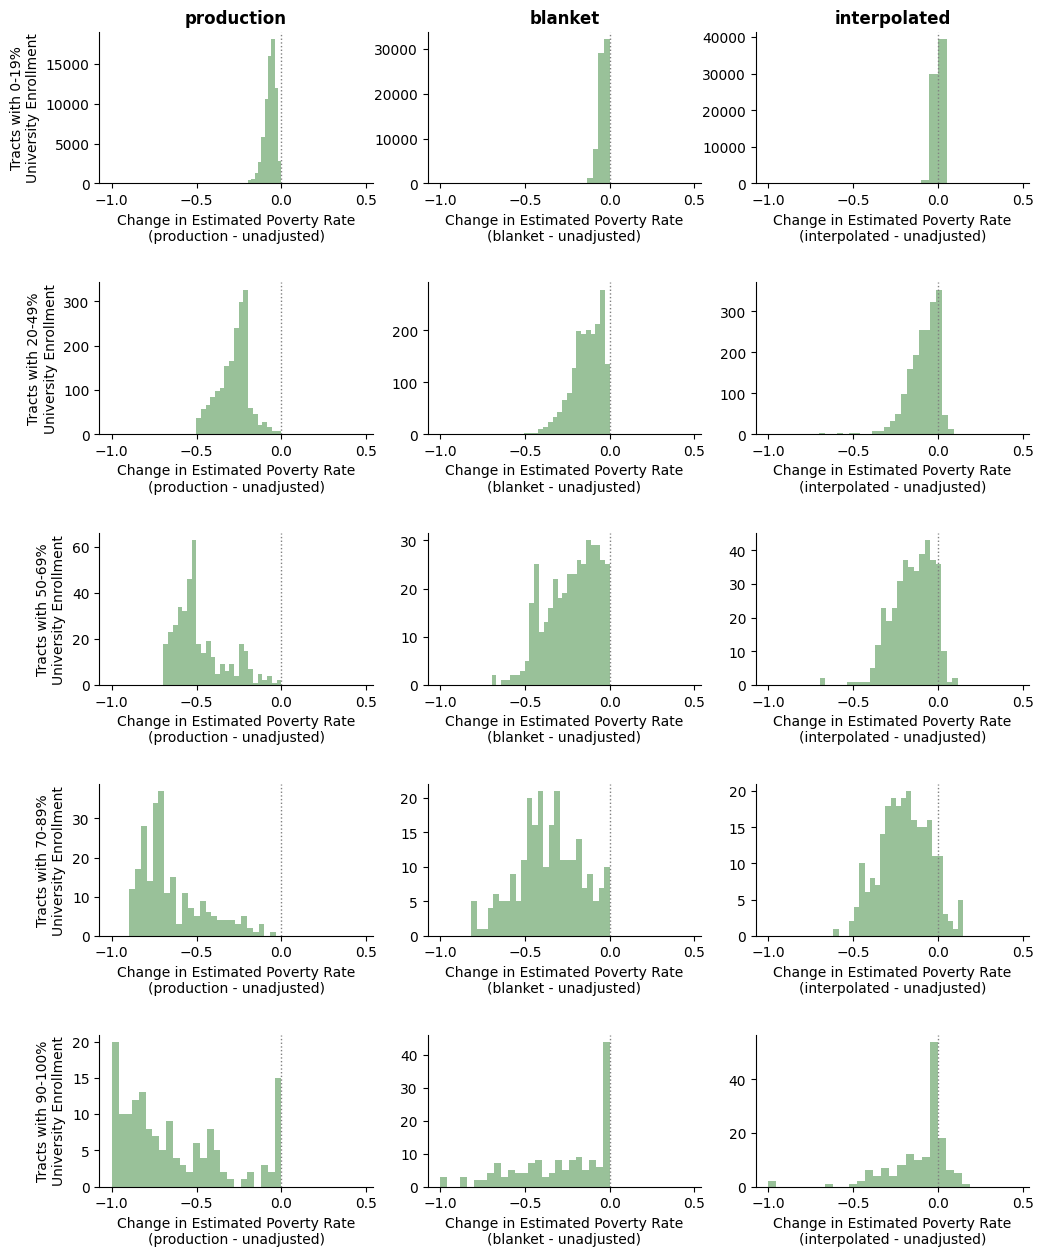

In [23]:
fig, ax = plt.subplots(5, 3, figsize=(12,15), sharex=True)

for b, bucket in enumerate(census_acs['university_attendance_bucketed'].unique()):
    bucket_df = census_acs[census_acs.university_attendance_bucketed==bucket]
    for m, method in enumerate(adjustment_methods):
        nice_method = method.replace('poverty_rate__', '')
        ax[b][m].hist(bucket_df[method+'__diff_vs_unadjusted'], 
                      bins=25, alpha=0.4, color='darkgreen')
        if m==0:
            ax[b][m].set_ylabel(f'Tracts with {bucket}\nUniversity Enrollment')
        if b==0:
            ax[b][m].set_title(nice_method, fontweight='bold')
        ax[b][m].xaxis.set_tick_params(labelbottom=True)
        ax[b][m].set_xlabel(f"Change in Estimated Poverty Rate\n({nice_method} - unadjusted)")
        ax[b][m].spines[['right', 'top']].set_visible(False)
        ax[b][m].axvline(x=0, color='grey', linestyle='dotted', linewidth=1)
plt.subplots_adjust(hspace=0.65)

In [24]:
for m in adj_diff_cols:
    print(m)
    up_over_10 = len(census_acs[census_acs[m]>0.1])
    print(f'Number of tracts where poverty rate increased by 10% or more:\t{up_over_10}')
    up_5_to_10 = len(census_acs[census_acs[m].between(0.05, 0.1)])
    print(f'Number of tracts where poverty rate increased by 5-10%:\t\t{up_5_to_10}')
    within_5 = len(census_acs[census_acs[m].between(-0.05, 0.05)])
    print(f'Number of tracts where poverty rate within 5% of unadjusted:\t{within_5}')
    down_5_to_10 = len(census_acs[census_acs[m].between(-0.1, -0.05)])
    print(f'Number of tracts where poverty rate decreased by 5-10%:\t\t{down_5_to_10}')
    down_10_to_25 = len(census_acs[census_acs[m].between(-0.25, -0.1)])
    print(f'Number of tracts where poverty rate decreased by 10-25%:\t{down_10_to_25}')
    down_25_to_50 = len(census_acs[census_acs[m].between(-0.5, -0.25)])
    print(f'Number of tracts where poverty rate decreased by 25-50%:\t{down_25_to_50}')
    down_over_50 = len(census_acs[census_acs[m]<-0.5])
    print(f'Number of tracts where poverty rate increased by more than 50%:\t{down_over_50}')
    print('\n')


poverty_rate__production__diff_vs_unadjusted
Number of tracts where poverty rate increased by 10% or more:	0
Number of tracts where poverty rate increased by 5-10%:		0
Number of tracts where poverty rate within 5% of unadjusted:	24665
Number of tracts where poverty rate decreased by 5-10%:		35851
Number of tracts where poverty rate decreased by 10-25%:	11037
Number of tracts where poverty rate decreased by 25-50%:	1188
Number of tracts where poverty rate increased by more than 50%:	544


poverty_rate__blanket__diff_vs_unadjusted
Number of tracts where poverty rate increased by 10% or more:	0
Number of tracts where poverty rate increased by 5-10%:		0
Number of tracts where poverty rate within 5% of unadjusted:	51146
Number of tracts where poverty rate decreased by 5-10%:		18943
Number of tracts where poverty rate decreased by 10-25%:	2489
Number of tracts where poverty rate decreased by 25-50%:	572
Number of tracts where poverty rate increased by more than 50%:	123


poverty_rate__inter

### Distribution of changes compared to prod

In [25]:
prod_diff_cols = [x+'__diff_vs_production' for x in new_methods]
census_acs[prod_diff_cols].describe()

,poverty_rate__unadjusted__diff_vs_production,poverty_rate__blanket__diff_vs_production,poverty_rate__interpolated__diff_vs_production
count,73273.000000,73273.000000,73273.000000
mean,0.076810,0.031964,0.074359
std,0.073824,0.048361,0.062112
min,0.000000,-0.823406,-0.823406
25%,0.043158,0.013971,0.043577
50%,0.062705,0.022511,0.064321
75%,0.088099,0.036795,0.090905
max,1.000000,0.999421,1.000000


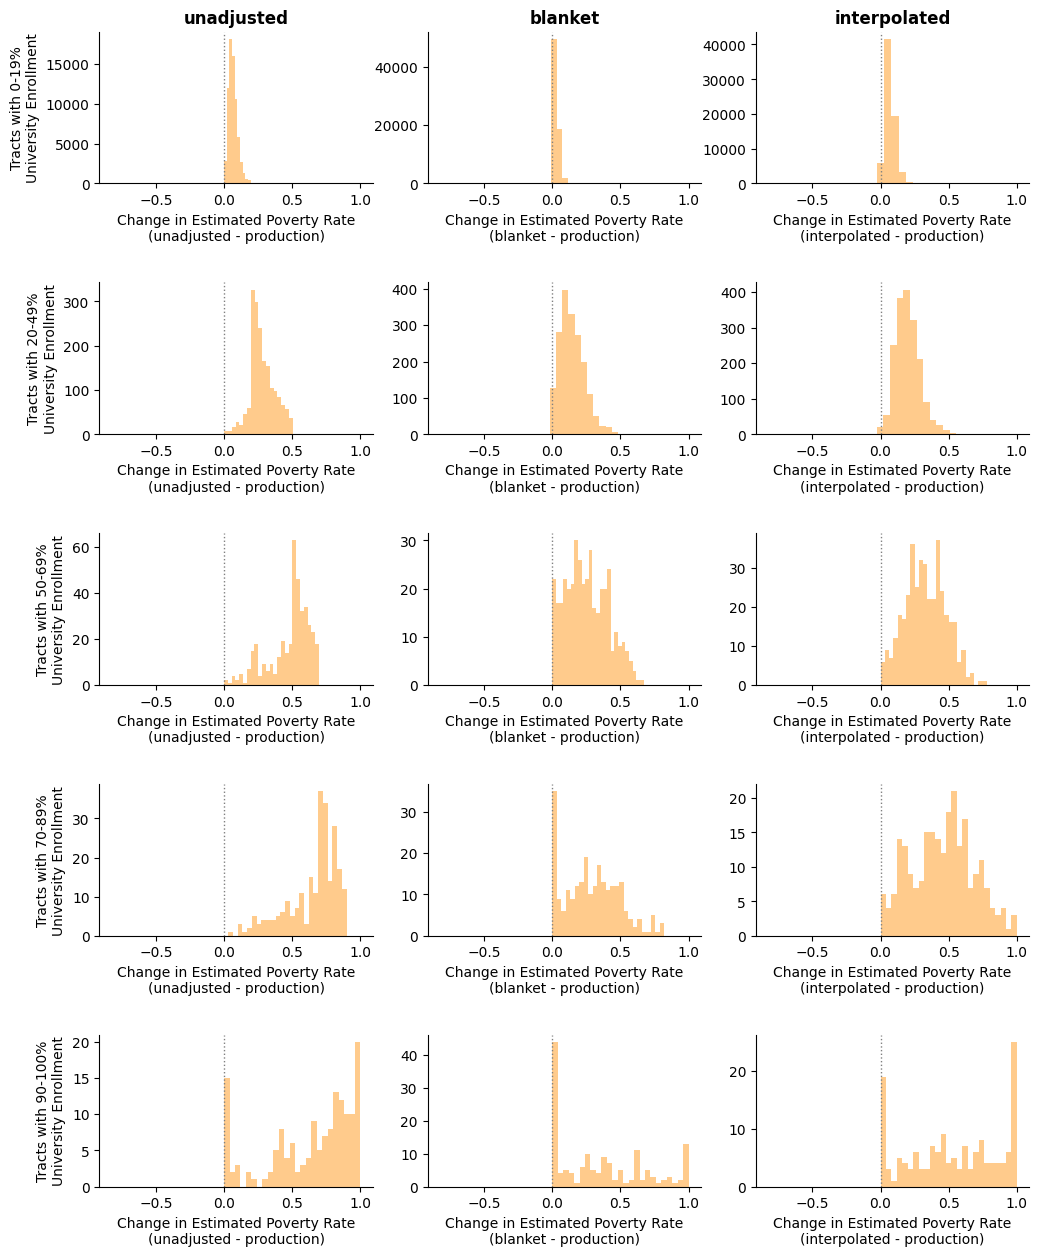

In [26]:
fig, ax = plt.subplots(5, 3, figsize=(12,15), sharex=True)

for b, bucket in enumerate(census_acs['university_attendance_bucketed'].unique()):
    bucket_df = census_acs[census_acs.university_attendance_bucketed==bucket]
    for m, method in enumerate(new_methods):
        nice_method = method.replace('poverty_rate__', '')
        ax[b][m].hist(bucket_df[method+'__diff_vs_production'], 
                      bins=25, alpha=0.45, color='darkorange')
        if m==0:
            ax[b][m].set_ylabel(f'Tracts with {bucket}\nUniversity Enrollment')
        if b==0:
            ax[b][m].set_title(nice_method, fontweight='bold')
        ax[b][m].xaxis.set_tick_params(labelbottom=True)
        ax[b][m].set_xlabel(f"Change in Estimated Poverty Rate\n({nice_method} - production)")
        ax[b][m].spines[['right', 'top']].set_visible(False)
        ax[b][m].axvline(x=0, color='grey', linestyle='dotted', linewidth=1)
plt.subplots_adjust(hspace=0.65)

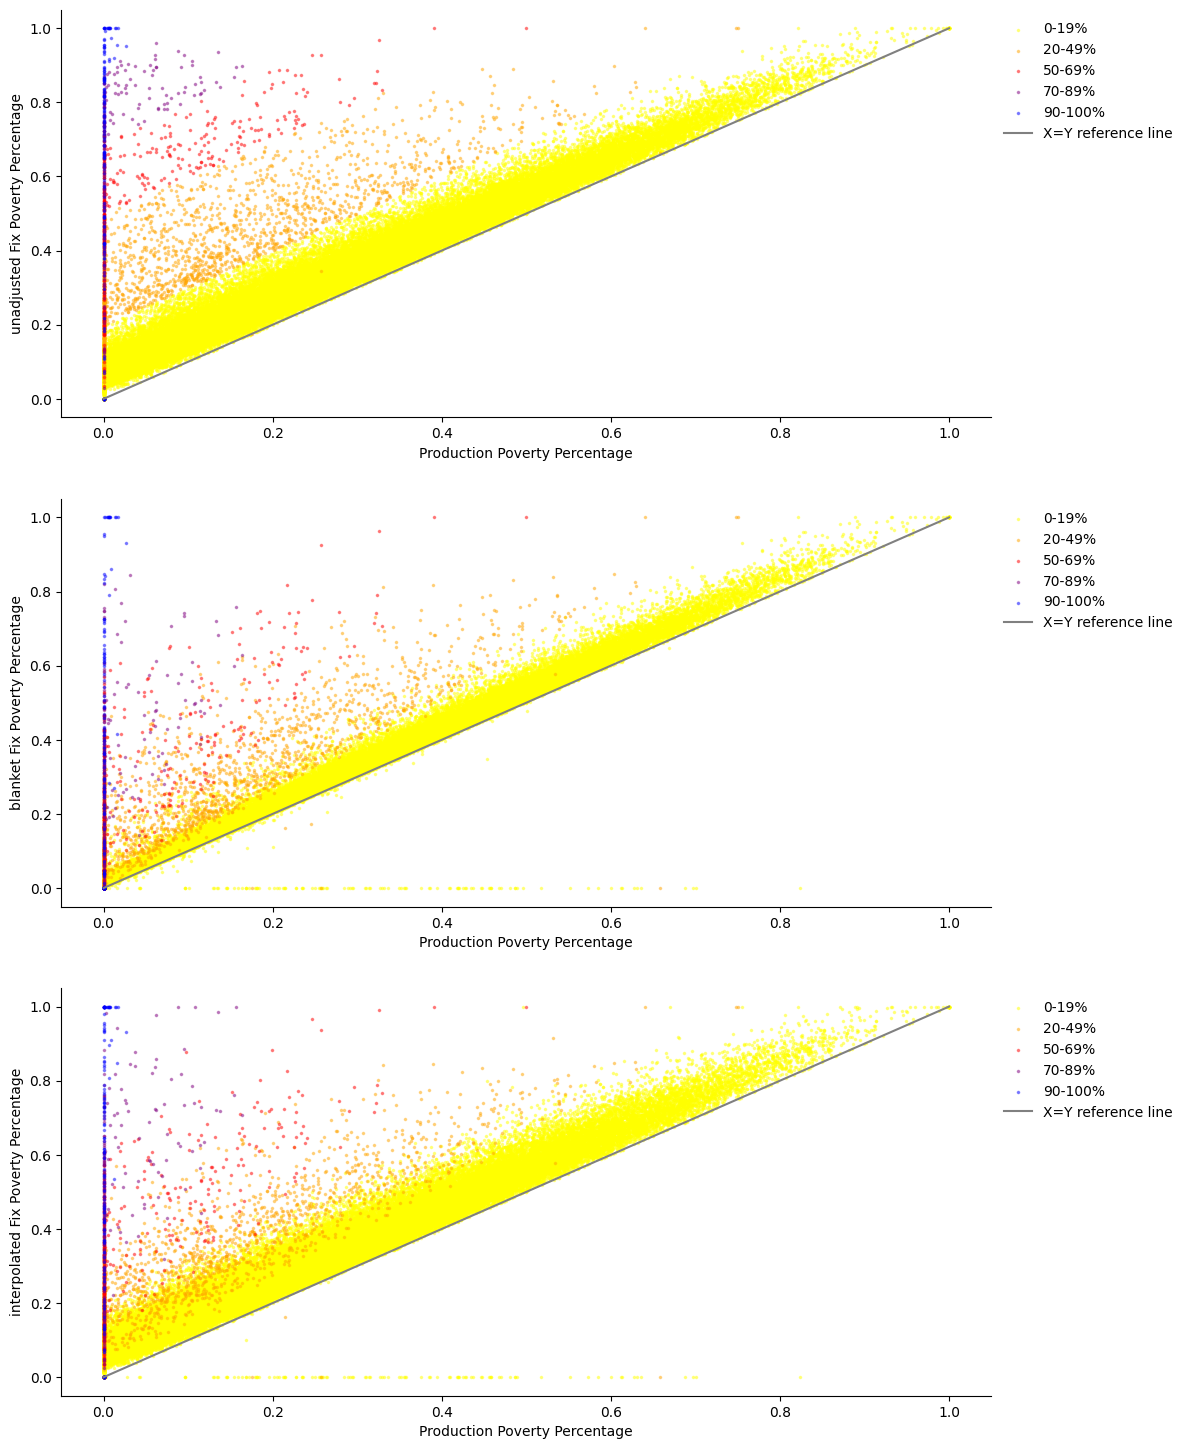

In [27]:
bucket_colors = {'0-19%': 'yellow',
                '20-49%': 'orange',
                '50-69%': 'red',
                '70-89%': 'purple',
                '90-100%': 'blue'}

fig, ax = plt.subplots(3, figsize=(12,18))
for m, method in enumerate(new_methods):
    nice_method = method.replace('poverty_rate__', '')
    for bucket in census_acs['university_attendance_bucketed'].unique():
        bucket_df = census_acs[census_acs.university_attendance_bucketed==bucket]
        ax[m].scatter(bucket_df[prod], bucket_df[method],  
                   alpha = 0.4, s=2.5, color = bucket_colors[bucket], label = bucket)
    ax[m].plot(np.arange(0, 1.01, .01), np.arange(0, 1.01, .01), 
               color='grey', label = 'X=Y reference line')
    ax[m].set_xlabel('Production Poverty Percentage')
    ax[m].set_ylabel(f"{nice_method} Fix Poverty Percentage")
    ax[m].legend(bbox_to_anchor=(1,1), frameon=False)
    ax[m].spines[['right', 'top']].set_visible(False)
plt.show()

## Compare estimated poverty rates in university areas

In [28]:
uni_df = census_acs.loc[census_acs.GEOID10_TRACT.isin(uni_tracts)]
uni_df['school_name'] = uni_df.GEOID10_TRACT.apply(lambda x: uni_dict[x])
uni_df[['school_name', 'GEOID10_TRACT']+[x for x in cols_to_look_at if x!='GEOID10_TRACT']]\
    .sort_values(by='GEOID10_TRACT')

/var/folders/5l/yccn5hf936bdstc1y3zxpbkc0000gn/T/ipykernel_32367/2648262686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_df['school_name'] = uni_df.GEOID10_TRACT.apply(lambda x: uni_dict[x])


,school_name,GEOID10_TRACT,poverty_rate__production,poverty_rate__unadjusted,poverty_rate__blanket,poverty_rate__interpolated,Total population,Everyone in poverty dataset,"Everyone in poverty dataset, minus all university","Population enrolled in an undergraduate, graduate, or professional program",Percent enrollment in college or graduate school,"Population below poverty line enrolled in an undergraduate, graduate, or professional program",Total population of individuals < 125% Federal Poverty Line,Total population of individuals < 200% Federal Poverty Line
861,University of Alabama,01073004500,0.079816,0.812524,0.706340,0.804204,5177,2619,1672,947,0.732708,656,1782,2128
6992,University of Southern California,06037222700,0.000000,0.860870,0.200000,0.850000,4071,345,60,285,0.985262,246,297,297
4764,"California State University, San Bernardino",06071004510,0.000000,0.535773,0.426775,0.426775,5422,3634,2943,691,0.566613,462,1119,1947
8901,Stanford University 2,06085511608,0.000000,0.218605,0.000000,0.186047,3302,215,86,129,0.971063,31,47,47
4403,Stanford University 1,06085513000,0.000000,0.394372,0.000000,0.176366,9578,4762,1453,3309,0.876839,1310,1517,1878
23695,University of Chicago,17031836200,0.000000,0.354167,0.055838,0.107868,1492,288,197,91,0.891873,57,72,102
46307,Columbia University,36061020300,0.000000,0.512456,0.098684,0.314790,3607,843,456,387,0.889963,211,316,432
69220,Hampton University,51650011400,0.000000,0.828512,0.366412,0.366412,2781,484,131,353,0.897723,331,373,401
69512,Norfolk State University,51710004700,0.000000,0.477407,0.457143,0.495918,2967,509,490,19,0.848869,0,72,243


## Check nulls

In [29]:
for m in all_methods:
    print(m)
    print(f'Total nulls:{sum(census_acs[m].isna())}')
    nonzero_nulls = sum(census_acs[census_acs["Total population"]>0][m].isna())
    print(f'Nulls in tracts with non-zero total population: {nonzero_nulls}')
    print('\n')

poverty_rate__production
Total nulls:703
Nulls in tracts with non-zero total population: 0


poverty_rate__unadjusted
Total nulls:703
Nulls in tracts with non-zero total population: 0


poverty_rate__blanket
Total nulls:0
Nulls in tracts with non-zero total population: 0


poverty_rate__interpolated
Total nulls:0
Nulls in tracts with non-zero total population: 0




In [30]:
state_to_fips_dict = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

territories_dict = {
    '60': 'AS (American Samoa)',
    '64': 'FM (Federated States of Micronesia)',
    '66': 'GU (Guam)',
    '68': 'MH (Marshall Islands)',
    '69': 'MP (Commonwealth of the Northern Mariana Islands)',
    '70': 'PW (Palau)',
    '72': 'PR (Puerto Rico)',
    '74': 'UM (U.S. Minor Outlying Islands)',
    '78': 'VI (U.S. Virgin Islands)',
    '81': 'Baker Island',
    '84': 'Howland Island',
    '86' : 'Jarvis Island',
    '67' : 'Johnston Atoll',
    '89' : 'Kingman Reef',
    '71' : 'Midway Islands',
    '76' : 'Navassa Island',
    '95' : 'Palmyra Atoll',
    '79' : 'Wake Island',
    }

fips_to_state_dict = {v:k for k,v in state_to_fips_dict.items()}
fips_to_state_dict.update(territories_dict)

census_acs['state_fips']=census_acs['GEOID10_TRACT'].str[:2]
census_acs['state']=census_acs['state_fips'].map(fips_to_state_dict)
census_acs[['state', 'state_fips', 'GEOID10_TRACT']].head()

,state,state_fips,GEOID10_TRACT
0,AL,01,01073001100
1,AL,01,01073001400
2,AL,01,01073002000
3,AL,01,01073003802
4,AL,01,01073004000


In [31]:
census_acs['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR (Puerto Rico)'],
      dtype=object)